In [1]:
import ktrain
import tensorflow as tf
print(tf.__version__)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


2.13.0


In [2]:
from ktrain import text

In [5]:
merged_aspirational_df = pd.read_csv("/Users/gbaldonado/Developer/ml-alma-taccti/ml-alma-taccti/data/processed_for_model/merged_themes_using_jaccard_method/merged_Aspirational_sentence_level_batch_1_jaccard.csv", encoding='utf-8')
merged_aspirational_df

training_df, test_df = train_test_split(merged_aspirational_df, test_size=0.1, random_state=18, stratify=merged_aspirational_df['label'])

,sentence,label,phrase
0,why am i here?,0,"[""Ever since I was little I wanted to be a doc..."
1,well why does anyone pursue a higher education?,0,"[""Ever since I was little I wanted to be a doc..."
2,to better one self and be able to succeed late...,0,"[""Ever since I was little I wanted to be a doc..."
3,ever since i was little i wanted to be a docto...,1,"[""Ever since I was little I wanted to be a doc..."
4,i always wanted to be able to help people and ...,0,"[""Ever since I was little I wanted to be a doc..."
...,...,...,...
4699,"i want to better myself, improve myself in eve...",0,['I want to be able to apply my knowledge to m...
4700,i have no problems applying myself when it com...,0,['I want to be able to apply my knowledge to m...
4701,grow mentally so that i can apply more physica...,0,['I want to be able to apply my knowledge to m...
4702,use what i learn and apply it in whatever care...,0,['I want to be able to apply my knowledge to m...


In [11]:
training_df, test_df = train_test_split(merged_aspirational_df, test_size=0.1, random_state=18, stratify=merged_aspirational_df['label'])

In [12]:
training_df.shape

(4233, 3)

In [13]:
test_df.shape

(471, 3)

In [5]:
def rename_and_encode(df):
    # Rename the 'sentences' column to 'sentence'
    df = df.rename(columns={'sentences': 'sentence'})
    
    # Check if 'labels' column already contains 0 and 1 values
    unique_values = df['label'].unique()
    
    if set(unique_values) == {0, 1}:
        # If the unique values are 0 and 1, no encoding is needed
        return df
    else:
        # Otherwise, map 'Yes' to 1 and 'No' to 0 in the 'labels' column
        df['label'] = df['label'].map({'Yes': 1, 'No': 0})
    
    return df

In [6]:
training_df_orig = pd.read_csv('../../data/csv/attainment_sentence_level_training_data.csv',encoding='utf-8')

In [7]:
training_df_orig.head()

,sentence,label,phrase
0,why i am here is because i want to fulfill my ...,1,['Why I am here is because I want to fulfill m...
1,i like to relate what i learn to everyday acti...,0,['Im here because I want to pursue a degree in...
2,im here because i want to pursue a degree in b...,1,['Im here because I want to pursue a degree in...
3,i am in this class to learn about topics that ...,0,['Iím here because I want to pursue a career i...
4,right after 12th grade i knew i wanted to majo...,0,['I want to have a career as an epidemiologist...


In [8]:
test_df = pd.read_csv('../../new_data/attainment/attainment_attainment_fall2019_2023_sentence_test_data.csv',encoding='utf-8')

In [9]:
test_df.shape

(752, 3)

In [10]:
test_df.head()

,key_essay,sentences,label
0,why am i herei am here to gain the skills i ne...,i also want a job that i love and this is a fi...,No
1,i am here because i want to do something with ...,i am specifically here in this class because i...,No
2,i am here because i want to have an engineerin...,to have that degree i need to learn physics an...,No
3,i am here to learn. i am here to make meaningf...,i also wish to give back to my parents who wor...,No
4,why am i herei am here to gain the skills i ne...,i desire to help others because in a way it he...,No


In [11]:
training_df = rename_and_encode(training_df)

test_df = rename_and_encode(test_df)
test_df

,key_essay,sentence,label
0,why am i herei am here to gain the skills i ne...,i also want a job that i love and this is a fi...,0
1,i am here because i want to do something with ...,i am specifically here in this class because i...,0
2,i am here because i want to have an engineerin...,to have that degree i need to learn physics an...,0
3,i am here to learn. i am here to make meaningf...,i also wish to give back to my parents who wor...,0
4,why am i herei am here to gain the skills i ne...,i desire to help others because in a way it he...,0
...,...,...,...
747,i am here because i want to get a degree. i wa...,i would love to become a doctor in the future ...,1
748,i d say i m here to get an education and try t...,this is why i m here,0
749,i m in college because i know that i can make ...,i m not shy to say it how it is and it will dr...,0
750,daniel knapp why am i here? why am i here? wel...,however i would say that i am here in this cla...,0


In [12]:
training_df

,key_essay,sentence,label
0,well the first reason i am here is because thi...,i did okay on the first quiz but that was beca...,0
1,"i am here because i want to learn, ive taken a...",while im here i can obtain a lot of useful ide...,0
2,"just as a basis for information, i am currentl...",but initially when i started i had wanted to b...,0
3,i am here because i know i struggle in chemist...,so after hearing how hard this class is i deci...,0
4,i am here at sfsu because i want to get a degr...,i decided to come to sfsu because it would sav...,0
...,...,...,...
2999,i am here in this class simply because it is a...,i am here in this class simply because it is a...,0
3000,i guess i am here since i have a physics lab w...,my purpose for taking physics is to have it as...,1
3001,i think that i'm here to contribute to the liv...,if something i can make or contribute my effor...,0
3002,why am i here?my journey into physics started ...,my hope for the class as a whole is to go forw...,0


In [14]:
MAXLEN = 150

In [15]:
X = training_df['sentence']
y = training_df['label']

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 18, stratify=y)

In [17]:
X_train

3631          i want to be an engineering for the future.
4275    i am here at sfsu to gain the knowledge and ex...
2646    i used to hate physics at high school because ...
812     i am majoring in prekinesiology and taking cla...
3408    i was thinking about studying abroad in the un...
                              ...                        
720     i want to be able to do probono work for famil...
711     all he did was fly for a couple years and move...
2447    i've never been a big fan of physics as a stud...
4390    another reason i am here right now is because ...
1067        i only have bits of memories from growing up.
Name: sentence, Length: 3809, dtype: object

In [18]:
X_test

1845    my class is a little slower paced, so the si c...
1099    i am in this lab section to complete the lab r...
3228    every day, i am encouraged by my family and fr...
164     i am here to obtain a better understanding of ...
152     not only am i making an impact on the medical ...
                              ...                        
4626    i am here because of the way that i have grown...
4036    its another tool in my belt, and a pillar of s...
510     i am excited to enter into a new field of stud...
2807    im here because i want to pursue a career in t...
3351    of all the sciences, i enjoy physics the most ...
Name: sentence, Length: 424, dtype: object

In [19]:
model_name = 'distilbert-base-uncased'

In [20]:
distillbert_transformer = text.Transformer(model_name, maxlen=MAXLEN, class_names=[0,1])
training_set = distillbert_transformer.preprocess_train(X_train.tolist(), y_train.tolist())
validation_set = distillbert_transformer.preprocess_test(X_test.tolist(), y_test.tolist())
distillbert_base_model = distillbert_transformer.get_classifier()

Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

preprocessing train...
language: en
train sequence lengths:
	mean : 21
	95percentile : 39
	99percentile : 55


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 21
	95percentile : 41
	99percentile : 59


In [21]:
distillbert_learner = ktrain.get_learner(distillbert_base_model, train_data=training_set, val_data=validation_set, batch_size=6)

Three possible suggestions for LR from plot:
	Longest valley (red): 4.85E-06
	Min numerical gradient (purple): 5.45E-07
	Min loss divided by 10 (omitted from plot): 6.17E-06

![](2023-11-07-23-09-21.png)

In [22]:
distillbert_learner.autofit(2E-5, epochs=5)



begin training using triangular learning rate policy with max lr of 2e-05...
Epoch 1/5
635/635 [==============================] - 116s 163ms/step - loss: 0.3553 - accuracy: 0.8653 - val_loss: 0.2908 - val_accuracy: 0.8656
Epoch 2/5
635/635 [==============================] - 100s 158ms/step - loss: 0.2634 - accuracy: 0.8766 - val_loss: 0.2835 - val_accuracy: 0.8703
Epoch 3/5
635/635 [==============================] - 101s 158ms/step - loss: 0.2215 - accuracy: 0.8963 - val_loss: 0.2917 - val_accuracy: 0.8514
Epoch 4/5
635/635 [==============================] - 97s 153ms/step - loss: 0.1916 - accuracy: 0.9142 - val_loss: 0.3149 - val_accuracy: 0.8420
Epoch 5/5
635/635 [==============================] - 99s 156ms/step - loss: 0.1595 - accuracy: 0.9262 - val_loss: 0.3732 - val_accuracy: 0.8373


In [23]:
for key,_ in distillbert_learner.history.history.items():
    print(key)

loss
accuracy
val_loss
val_accuracy
lr
iterations
momentum


In [24]:
distillbert_learner.history.history.items()

dict_items([('loss', [0.35534003376960754, 0.26337799429893494, 0.2215239256620407, 0.19158488512039185, 0.15950904786586761]), ('accuracy', [0.8653189539909363, 0.8766080141067505, 0.8962982296943665, 0.9141507148742676, 0.926227331161499]), ('val_loss', [0.29081177711486816, 0.28345441818237305, 0.2916691303253174, 0.3148546814918518, 0.3731685280799866]), ('val_accuracy', [0.8655660152435303, 0.8702830076217651, 0.8514150977134705, 0.8419811129570007, 0.8372641801834106]), ('lr', [2e-06, 2.0566038e-06, 2.1132075e-06, 2.1698113e-06, 2.226415e-06, 2.2830188e-06, 2.3396226e-06, 2.3962264e-06, 2.4528301e-06, 2.509434e-06, 2.5660377e-06, 2.6226414e-06, 2.6792452e-06, 2.735849e-06, 2.7924527e-06, 2.8490565e-06, 2.9056603e-06, 2.9622643e-06, 3.018868e-06, 3.0754718e-06, 3.1320756e-06, 3.1886793e-06, 3.245283e-06, 3.3018869e-06, 3.3584906e-06, 3.4150944e-06, 3.4716982e-06, 3.528302e-06, 3.5849057e-06, 3.6415095e-06, 3.6981132e-06, 3.754717e-06, 3.8113208e-06, 3.8679245e-06, 3.9245283e-06, 3

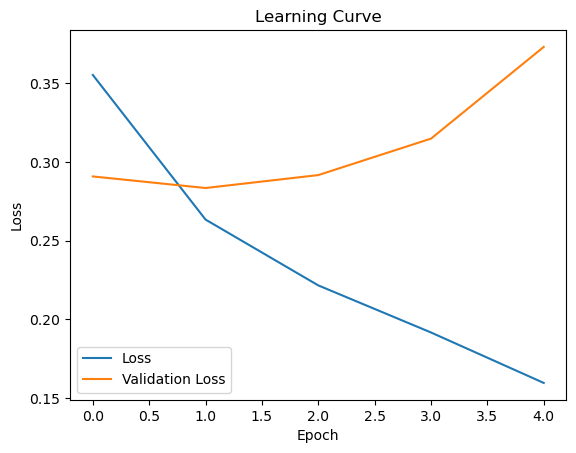

In [25]:
import matplotlib.pyplot as plt

# Load the loss and validation loss values.
loss = distillbert_learner.history.history["loss"]
val_loss = distillbert_learner.history.history["val_loss"]

# Create a figure and axes object.
fig, ax = plt.subplots()

# Plot the loss and validation loss values.
ax.plot(loss, label='Loss')
ax.plot(val_loss, label='Validation Loss')

# Set the labels and title of the plot.
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Learning Curve')

# Add a legend to the plot.
ax.legend()

# Show the plot.
plt.show()

In [26]:
distillbert_learner.validate(class_names=distillbert_transformer.get_classes())

14/14 [==============================] - 6s 271ms/step
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       371
           1       0.35      0.36      0.36        53

    accuracy                           0.84       424
   macro avg       0.63      0.63      0.63       424
weighted avg       0.84      0.84      0.84       424



array([[336,  35],
       [ 34,  19]])

In [27]:
distillbert_learner.model.summary()

Model: "tf_distil_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_39 (Dropout)        multiple                  0         
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
distillbert_predictor = ktrain.get_predictor(distillbert_learner.model, preproc=distillbert_transformer)

In [31]:
distillbert_test_data = test_df['sentence'].tolist()
distillbert_test_label = test_df['label'].tolist()

In [32]:
y_pred_distillbert = distillbert_predictor.predict(distillbert_test_data)

In [33]:
y_pred_distillbert = [int(x) for x in y_pred_distillbert]

In [34]:
tn, fp, fn, tp = confusion_matrix(distillbert_test_label, y_pred_distillbert).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))

True Negative: 370, False Positive: 42, False Negative: 38, True Positive: 21


In [35]:
print('  Classification Report:\n',classification_report(distillbert_test_label,y_pred_distillbert),'\n')

  Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       412
           1       0.33      0.36      0.34        59

    accuracy                           0.83       471
   macro avg       0.62      0.63      0.62       471
weighted avg       0.84      0.83      0.83       471
 



In [36]:
#distillbert_predictor.save('./model/distilbert_base_uncased_model') # 256 MB

In [37]:
print("AUC roc score for distillbert model: ", roc_auc_score(distillbert_test_label,y_pred_distillbert))

AUC roc score for distillbert model:  0.6269952279085076
